# Problem Statement

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

### Importing Libraries

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Loading Dataset

### Importing Data

In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer Conversion Prediction/Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [257]:
# Looking into the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [258]:
df.shape

(45211, 11)

In [259]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# ***Data Cleaning***

In [260]:
# Checking for Null values
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values in the given dataset.

In [261]:
# Exploring the Dataset
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [262]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [263]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [264]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [265]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [266]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [267]:
df.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [268]:
df.dur.values

array([ 261,  151,   76, ..., 1127,  508,  361])

In [269]:
df.num_calls.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [270]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [271]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# ***Exploratory Data Analysis***

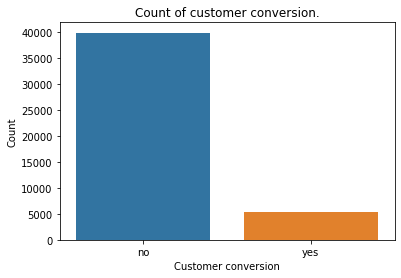

In [272]:
# Visualising the Data
sns.countplot(x=df['y'])
plt.title('Count of customer conversion.')
plt.xlabel('Customer conversion')
plt.ylabel('Count')
plt.show()

The following graph of target variable shows it is an unequal distribution.

## **age**

In [273]:
px.histogram(x=df['age'])

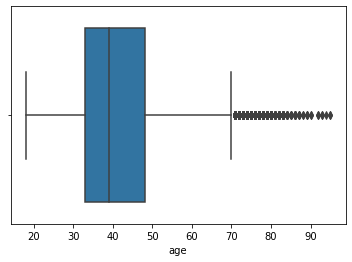

In [274]:
sns.boxplot(x=df['age'])

Here we can see that there are a lot of outliers.

In [275]:
below_20_0=0
below_20_1=0
age_30_0=0
age_30_1=0
age_40_0=0
age_40_1=0
age_50_0=0
age_50_1=0
age_60_0=0
age_60_1=0
above_60_0=0
above_60_1=0
for i in range(len(df)):
    if df.age.iloc[i]<=20:
      if df.y.iloc[i]=='no':
        below_20_0+=1
      else:
        below_20_1+=1
    elif df.age.iloc[i]>20 and df.age.iloc[i]<=30:
      if df.y.iloc[i]=='no':
        age_30_0+=1
      else:
        age_30_1+=1
    elif df.age.iloc[i]>30 and df.age.iloc[i]<=40:
      if df.y.iloc[i]=='no':
        age_40_0+=1
      else:
        age_40_1+=1
    elif df.age.iloc[i]>40 and df.age.iloc[i]<=50:
      if df.y.iloc[i]=='no':
        age_50_0+=1
      else:
        age_50_1+=1
    elif df.age.iloc[i]>50 and df.age.iloc[i]<=60:
      if df.y.iloc[i]=='no':
        age_60_0+=1
      else:
        age_60_1+=1
    else:
      if df.y.iloc[i]=='no':
        above_60_0+=1
      else:
        above_60_1+=1
data={'no':[below_20_0,age_30_0,age_40_0,age_50_0,age_60_0,above_60_0],
      'yes':[below_20_1,age_30_1,age_40_1,age_50_1,age_60_1,above_60_1]}
age_cons = pd.DataFrame(data=data,index=['below_20','age_30','age_40','age_50','age_60','above_60'])
age_cons

,no,yes
below_20,64,33
age_30,5821,1112
age_40,15875,1812
age_50,10220,1019
age_60,7256,811
above_60,686,502


In [276]:
fig = go.Figure()
fig.add_trace(go.Bar(x=age_cons.index, y=age_cons.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=age_cons.index, y=age_cons.no,
                base=[-64,-5821,-15875,-10220,-7256,-686],marker_color='yellow',
                name='no'))

fig.show()

In [277]:
total_below_20=below_20_0+below_20_1
below_20_0p=(below_20_0/total_below_20)*100
below_20_1p=100-below_20_0

total_age_30=age_30_0+age_30_1
age_30_0p=(age_30_0/total_age_30)*100
age_30_1p=100-age_30_0p

total_age_40=age_40_0+age_40_1
age_40_0p=(age_40_0/total_age_40)*100
age_40_1p=100-age_40_0p

total_age_50=age_50_0+age_50_1
age_50_0p=(age_50_0/total_age_50)*100
age_50_1p=100-age_50_0p

total_age_60=age_60_0+age_60_1
age_60_0p=(age_60_0/total_age_60)*100
age_60_1p=100-age_60_0p

total_above_60=above_60_0+above_60_1
above_60_0p=(above_60_0/total_above_60)*100
above_60_1p=100-above_60_0p

data={'no':[below_20_0p,age_30_0p,age_40_0p,age_50_0p,age_60_0p,above_60_0p],
      'yes':[below_20_1p,age_30_1p,age_40_1p,age_50_1p,age_60_1p,above_60_1p]}
age_cons_p = pd.DataFrame(data=data,index=['below_20p','age_30p','age_40p','age_50p','age_60p','above_60p'])
age_cons_p

,no,yes
below_20p,65.979381,36.000000
age_30p,83.960767,16.039233
age_40p,89.755187,10.244813
age_50p,90.933357,9.066643
age_60p,89.946696,10.053304
above_60p,57.744108,42.255892


In [278]:
fig = go.Figure()
fig.add_trace(go.Bar(x=age_cons_p.index, y=age_cons_p.yes,
                base=0,marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=age_cons_p.index, y=age_cons_p.no,
                base=[-65.98,-83.97,-89.8,-90.94,-89.95,-57.8],marker_color='yellow',
                name='no'))

fig.show()

From the above graph we can say two most insurance buying groups are 

1) above 60 aged people
2) below 20 aged people

People likely to get insurance decreases from 20 till age 50 and we can see a sudden rise after 50.

# **job**

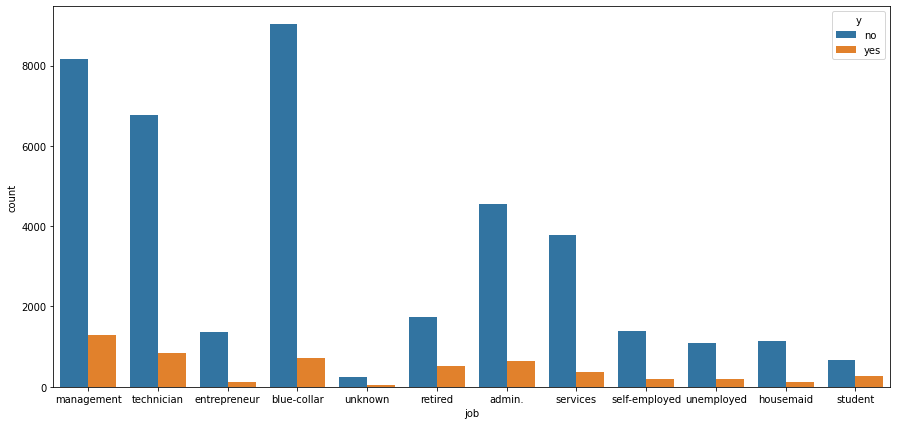

In [279]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['job'],hue=df['y'],data=df)

In [280]:
# Management Percentage
mgt = (df[(df['job']=='management')]['y']).value_counts()
mgt_per_yes = ((mgt['yes'] / (mgt['yes'] + mgt['no']))*100).round(2)
mgt_per_no = 100 - mgt_per_yes

# Technician Percentage
tech = (df[(df['job']=='technician')]['y']).value_counts()
tech_per_yes = ((tech['yes'] / (tech['yes'] + tech['no']))*100).round(2)
tech_per_no = 100 - (tech_per_yes)

# Entrepreneur Percentage
entr = (df[(df['job']=='entrepreneur')]['y']).value_counts()
entr_per_yes = ((entr['yes'] / (entr['yes'] + entr['no']))*100).round(2)
entr_per_no = 100 - entr_per_yes

# Blue-Collar Percentage
blue_col = (df[(df['job']=='blue-collar')]['y']).value_counts()
blue_col_per_yes = ((blue_col['yes'] / (blue_col['yes'] + blue_col['no']))*100).round(2)
blue_col_per_no = 100 - blue_col_per_yes

# Unknown Percentage
unko = (df[(df['job']=='unknown')]['y']).value_counts()
unko_per_yes = ((unko['yes'] / (unko['yes'] + unko['no']))*100).round(2)
unko_per_no = 100 - unko_per_yes

# Retired Percentage
rtd = (df[(df['job']=='retired')]['y']).value_counts()
rtd_per_yes = ((rtd['yes'] / (rtd['yes'] + rtd['no']))*100).round(2)
rtd_per_no = 100 - rtd_per_yes

# Admin Percentage
adm = (df[(df['job']=='admin.')]['y']).value_counts()
adm_per_yes = ((adm['yes'] / (adm['yes'] + adm['no']))*100).round(2)
adm_per_no = 100 - adm_per_yes

# Services Percentage
serv = (df[(df['job']=='services')]['y']).value_counts()
serv_per_yes = ((serv['yes'] / (serv['yes'] + serv['no']))*100).round(2)
serv_per_no = 100 - serv_per_yes

# Self-Employed Percentage
self_emp = (df[(df['job']=='self-employed')]['y']).value_counts()
self_emp_per_yes = ((self_emp['yes'] / (self_emp['yes'] + self_emp['no']))*100).round(2)
self_emp_per_no = 100 - self_emp_per_yes

# UnEmployed Percentage
unemp = (df[(df['job']=='unemployed')]['y']).value_counts()
unemp_per_yes = ((unemp['yes'] / (unemp['yes'] + unemp['no']))*100).round(2)
unemp_per_no = 100 - unemp_per_yes

# Housemaid Percentage
maid = (df[(df['job']=='housemaid')]['y']).value_counts()
maid_per_yes = ((maid['yes'] / (maid['yes'] + maid['no']))*100).round(2)
maid_per_no = 100 - maid_per_yes

# Student Percentage
stu = (df[(df['job']=='student')]['y']).value_counts()
stu_per_yes = ((stu['yes'] / (stu['yes'] + stu['no']))*100).round(2)
stu_per_no = 100 - stu_per_yes

data = {'no': [mgt_per_no,tech_per_no,entr_per_no,blue_col_per_no,unko_per_no,rtd_per_no,adm_per_no,serv_per_no,self_emp_per_no,unemp_per_no,maid_per_no,stu_per_no],
        'yes': [mgt_per_yes,tech_per_yes,entr_per_yes,blue_col_per_yes,unko_per_yes,rtd_per_yes,adm_per_yes,serv_per_yes,self_emp_per_yes,unemp_per_yes,maid_per_yes,stu_per_yes]}
job_per = pd.DataFrame(data=data,index=['management','technician','entrepreneur','blue-collar','unknown','retired','admin','services','self-employed','unemployed','housemaid','student'])
job_per



fig = go.Figure()
fig.add_trace(go.Bar(x=job_per.index, y=job_per.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=job_per.index, y=job_per.no,
                base=[-86.24,-88.94,-91.73,-92.73,-88.19,-77.21,-87.80,-91.12,-88.16,-84.50,-91.21,-71.32],marker_color='yellow',
                name='no'))

fig.show()

The graph shows Students and Retired persons are more likely to opt for an insurance.

# **marital**

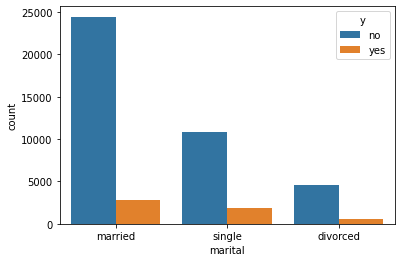

In [281]:
sns.countplot(x=df['marital'],hue=df['y'],data=df)

In [282]:
single_0=0
single_1=0
married_0=0
married_1=0
divorced_0=0
divorced_1=0
for i in range(len(df)):
  if df.marital.iloc[i]=='single':
    if df.y.iloc[i]=='no':
      single_0+=1
    else:
      single_1+=1
  elif df.marital.iloc[i]=='married':
    if df.y.iloc[i]=='no':
      married_0+=1
    else:
      married_1+=1
  else:
    if df.marital.iloc[i]=='no':
      divorced_0+=1
    else:
      divorced_1+=1
data={'no':[single_0,married_0,divorced_0],
      'yes':[single_1,married_1,divorced_1]}
marital_cons=pd.DataFrame(data=data,index=['single','married','divorced'])
marital_cons

,no,yes
single,10878,1912
married,24459,2755
divorced,0,5207


In [283]:
fig = go.Figure()
fig.add_trace(go.Bar(x=marital_cons.index, y=marital_cons.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=marital_cons.index, y=marital_cons.no,
                base=[-10878,-24459,0],marker_color='yellow',
                name='no'))

fig.show()

In [284]:
total_single=single_0+single_1
single_0p=(single_0/total_single)*100
single_1p=100-single_0p

total_married=married_0+married_1
married_0p=(married_0/total_married)*100
married_1p=100-married_0p

total_divorced=divorced_0+divorced_1
divorced_0p=(divorced_0/total_divorced)*100
divorced_1p=100-divorced_0p

data={'no':[single_0p,married_0p,divorced_0p],
      'yes':[single_1p,married_1p,divorced_1p]}
marital_cons_per=pd.DataFrame(data=data,index=['single','married','divorced'])
marital_cons_per

,no,yes
single,85.050821,14.949179
married,89.876534,10.123466
divorced,0.000000,100.000000


In [285]:
fig = go.Figure()
fig.add_trace(go.Bar(x=marital_cons_per.index, y=marital_cons_per.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=marital_cons_per.index, y=marital_cons_per.no,
                base=[-85.1,-89.9,0],marker_color='yellow',
                name='no'))

fig.show()

From the above graph we can say,

1) People from divorced group getting an insurance is very high

2)Many were getting insured after a married life.

# **edu_qual**

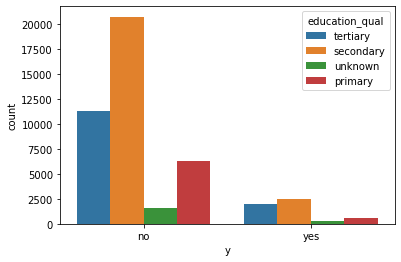

In [286]:
sns.countplot(x=df['y'],hue=df['education_qual'],data=df)

In [287]:
primary_0=0
primary_1=0
secondary_0=0
secondary_1=0
tertiary_0=0
tertiary_1=0
unknown_0=0
unknown_1=0
for i in range(len(df)):
  if df.education_qual.iloc[i]=='primary':
    if df.y.iloc[i]=='no':
      primary_0+=1
    else:
      primary_1+=1
  elif df.education_qual.iloc[i]=='secondary':
    if df.y.iloc[i]=='no':
      secondary_0+=1
    else:
      secondary_1+=1
  elif df.education_qual.iloc[i]=='tertiary':
    if df.y.iloc[i]=='no':
      tertiary_0+=1
    else:
      tertiary_1+=1
  else:
    if df.y.iloc[i]=='no':
      unknown_0+=1
    else:
      unknown_1+=1
data={'no':[primary_0,secondary_0,tertiary_0,unknown_0],
      'yes':[primary_1,secondary_1,tertiary_1,unknown_1]}
edu_cons=pd.DataFrame(data=data,index=['primary','secondary','tertiary','unknown'])
edu_cons

,no,yes
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [288]:
total_primary=primary_0+primary_1
primary_0p=(primary_0/total_primary)*100
primary_1p=100-primary_0p

total_secondary=secondary_0+secondary_1
secondary_0p=(secondary_0/total_secondary)*100
secondary_1p=100-secondary_0p

total_tertiary=tertiary_0+tertiary_1
tertiary_0p=(tertiary_0/total_tertiary)*100
tertiary_1p=100-tertiary_0p

total_unknown=unknown_0+unknown_1
unknown_0p=(unknown_0/total_unknown)*100
unknown_1p=100-unknown_0p

data={'no':[primary_0p,secondary_0p,tertiary_0p,unknown_0p],
      'yes':[primary_1p,secondary_1p,tertiary_1p,unknown_1p]}
edu_cons_per=pd.DataFrame(data=data,index=["primary","secondary","tertiary","unknown"])
edu_cons_per

,no,yes
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


In [289]:
fig = go.Figure()
fig.add_trace(go.Bar(x=edu_cons_per.index, y=edu_cons_per.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=edu_cons_per.index, y=edu_cons_per.no,
                base=[-91.4,-89.5,-85,-86.5],marker_color='yellow',
                name='no'))

fig.show()

The above graph can be interepreted as with increase in Educational qualification the person opting for an insurance increases.

1)Higher educated people are going to be a good choice for the company to make a call.

# **call_type**

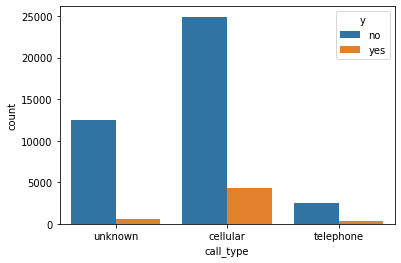

In [290]:
sns.countplot(x=df['call_type'],hue=df['y'])

In [291]:
unknown_0=0
unknown_1=0
cellular_0=0
cellular_1=0
telephone_0=0
telephone_1=0
for i in range(len(df)):
  if df.call_type.iloc[i]=='unknown':
    if df.y.iloc[i]=='no':
      unknown_0+=1
    else:
      unknown_1+=1
  elif df.call_type.iloc[i]=='cellular':
    if df.y.iloc[i]=='no':
      cellular_0+=1
    else:
      cellular_1+=1
  else:
    if df.y.iloc[i]=='no':
      telephone_0+=1
    else:
      telephone_1+=1
data={'no':[unknown_0,cellular_0,telephone_0],
      'yes':[unknown_1,cellular_1,telephone_1]}
call_type_cons=pd.DataFrame(data=data,index=['unknown','cellular','telephone'])
call_type_cons

,no,yes
unknown,12490,530
cellular,24916,4369
telephone,2516,390


In [292]:
fig = go.Figure()
fig.add_trace(go.Bar(x=call_type_cons.index, y=call_type_cons.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=call_type_cons.index, y=call_type_cons.no,
                base=[-12490,-24916,-2516],marker_color='yellow',
                name='no'))

fig.show()

In [293]:
total_unknown=unknown_0+unknown_1
unknown_0p=(unknown_0/total_unknown)*100
unknown_1p=100-unknown_0p

total_cellular=cellular_0+cellular_1
cellular_0p=(cellular_0/total_cellular)*100
cellular_1p=100-cellular_0p

total_telephone=telephone_0+telephone_1
telephone_0p=(telephone_0/total_telephone)*100
telephone_1p=100-telephone_0p

data={'no':[unknown_0p,cellular_0p,telephone_0p],
      'yes':[unknown_1p,cellular_1p,telephone_1p]}
call_cons_per=pd.DataFrame(data=data,index=['unknown','cellular','telephone'])
call_cons_per

,no,yes
unknown,95.929339,4.070661
cellular,85.081100,14.918900
telephone,86.579491,13.420509


In [294]:
fig = go.Figure()
fig.add_trace(go.Bar(x=call_cons_per.index, y=call_cons_per.yes,
                base=[0],marker_color='blue',
                name='yes'
                ))
fig.add_trace(go.Bar(x=call_cons_per.index, y=call_cons_per.no,
                base=[-96,-85.1,-86.6],marker_color='yellow',
                name='no'))

fig.show()

This graph shows the Insurance company employees are making good use of Cellular phones to get a customer.

## **day**

In [295]:
week_1_0=0
week_1_1=0
week_2_0=0
week_2_1=0
week_3_0=0
week_3_1=0
week_4_0=0
week_4_1=0
for i in range(len(df)):
  if df.day.iloc[i]<8:
    if df.y.iloc[i]=='no':
      week_1_0+=1
    else:
      week_1_1+=1
  elif df.day.iloc[i]>=8 and df.day.iloc[i]<15:
    if df.y.iloc[i]=='no':
      week_2_0+=1
    else:
      week_2_1+=1
  elif df.day.iloc[i]>=15 and df.day.iloc[i]<22:
    if df.y.iloc[i]=='no':
      week_3_0+=1
    else:
      week_3_1+=1
  else:
    if df.y.iloc[i]=='no':
      week_4_0+=1
    else:
      week_4_1+=1
data={'no':[week_1_0,week_2_0,week_3_0,week_4_0],
      'yes':[week_1_1,week_2_1,week_3_1,week_4_1]
      }
day_cons=pd.DataFrame(data=data,index=['week_1','week_2','week_3','week_4'])
day_cons

,no,yes
week_1,8565,1233
week_2,9065,1377
week_3,12551,1349
week_4,9741,1330


In [296]:
week_1_total = week_1_0 + week_1_1

week_1_0_per = (week_1_0/week_1_total)*100

week_1_1_per = 100-week_1_0_per

In [297]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_cons.index, y=day_cons.no,
                base=0,marker_color='lightslategrey',
                name='no'
                ))
fig.add_trace(go.Bar(x=day_cons.index, y=day_cons.yes,
                base=[0],marker_color='blue',
                name='yes'))

fig.show()

In [298]:
total_week_1=week_1_0+week_1_1
week_1_0p=(week_1_0/total_week_1)*100
week_1_1p=100-week_1_0p

total_week_2=week_2_0+week_2_1
week_2_0p=(week_2_0/total_week_2)*100
week_2_1p=100-week_2_0p

total_week_3=week_3_0+week_3_1
week_3_0p=(week_3_0/total_week_3)*100
week_3_1p=100-week_3_0p

total_week_4=week_4_0+week_4_1
week_4_0p=(week_4_0/total_week_4)*100
week_4_1p=100-week_4_0p


data={'no':[week_1_0p,week_2_0p,week_3_0p,week_4_0p],
      'yes':[week_1_1p,week_2_1p,week_3_1p,week_4_1p]}
week_cons_per=pd.DataFrame(data=data,index=['week_1','week_2','week_3','week_4'])
week_cons_per

,no,yes
week_1,87.415799,12.584201
week_2,86.812871,13.187129
week_3,90.294964,9.705036
week_4,87.986632,12.013368


In [299]:
fig = go.Figure()
fig.add_trace(go.Bar(x=week_cons_per.index, y=week_cons_per.yes,
                base=[0],marker_color='blue',
                name='yes'))
fig.add_trace(go.Bar(x=week_cons_per.index, y=week_cons_per.no,
                base=[-87.42,-86.9,-90.3,-88],marker_color='yellow',
                name='no'
                ))

fig.show()

The above graph shows, 

1)People are more likely to get an insurance in the second week of the month

2)The Third week is a bad week to ask customers for insurance

## **month**

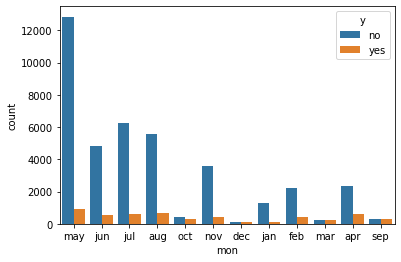

In [300]:
sns.countplot(x=df['mon'],hue=df['y'])

In [301]:
df['mon']=df['mon'].replace({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
first_quart_0 =0
first_quart_1 =0
second_quart_0 =0
second_quart_1 =0
third_quart_0 =0
third_quart_1 =0
fourth_quart_0 =0
fourth_quart_1 =0

for i in range(len(df)):
  if df.mon.iloc[i]<3:
    if df.y.iloc[i]=='no':
      first_quart_0+=1
    else:
      first_quart_1+=1
  elif df.mon.iloc[i]>=3 and df.mon.iloc[i]<6:
    if df.y.iloc[i]=='no':
      second_quart_0+=1
    else:
      second_quart_1+=1
  elif df.mon.iloc[i]>=6 and df.mon.iloc[i]<9:
    if df.y.iloc[i]=='no':
      third_quart_0+=1
    else:
      third_quart_1+=1
  else:
    if df.y.iloc[i]=='no':
      fourth_quart_0+=1
    else:
      fourth_quart_1+=1


data={'no':[first_quart_0,second_quart_0,third_quart_0,fourth_quart_0],
      'yes':[first_quart_1,second_quart_1,third_quart_1,fourth_quart_1]
      }
mon_cons=pd.DataFrame(data=data,index=['first_quart','second_quart','third_quart','fourth_quart'])
print(mon_cons)




                 no   yes
first_quart    3698   831
second_quart  19991  2048
third_quart   12137  1584
fourth_quart   4096   826


In [302]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=mon_cons.index, y=mon_cons.no,
                base=0,marker_color='red',
                name='no'))
fig.add_trace(go.Bar(x=mon_cons.index, y=mon_cons.yes,
                base=[-831,-2048,-1584,-826],marker_color='green',
                name='yes'
                ))
fig.show()

In [303]:
total_first_quart=first_quart_0+first_quart_1
first_quart_0p=(first_quart_0/total_first_quart)*100
first_quart_1p=100-first_quart_0p

total_second_quart=second_quart_0+second_quart_1
second_quart_0p=(second_quart_0/total_second_quart)*100
second_quart_1p=100-second_quart_0p


total_third_quart=third_quart_0+third_quart_1
third_quart_0p=(third_quart_0/total_third_quart)*100
third_quart_1p=100-third_quart_0p

total_fourth_quart=fourth_quart_0+fourth_quart_1
fourth_quart_0p=(fourth_quart_0/total_fourth_quart)*100
fourth_quart_1p=100-fourth_quart_0p

data={'no':[first_quart_0p,second_quart_0p,third_quart_0p,fourth_quart_0p],
      'yes':[first_quart_1p,second_quart_1p,third_quart_1p,fourth_quart_1p]}
mon_cons_per=pd.DataFrame(data=data,index=['first_quart','second_quart','third_quart','fourth_quart'])
mon_cons_per

,no,yes
first_quart,81.651579,18.348421
second_quart,90.707382,9.292618
third_quart,88.455652,11.544348
fourth_quart,83.218204,16.781796


In [304]:
fig = go.Figure()

fig.add_trace(go.Bar(x=mon_cons_per.index, y=mon_cons_per.yes,
                base=[0],marker_color='green',
                name='yes'
                ))
fig.add_trace(go.Bar(x=mon_cons_per.index, y=mon_cons_per.no,
                base=[-81.7,-90.7,-88.5,-83.2],marker_color='red',
                name='no'))

fig.show()

The month graph shows People are more likely to get an insurance in the beginning and the end of the year.

Here the second quarter is the worst time for a client to ask insurance from customers.

In [305]:
num_calls_below_3_n = 0
num_calls_below_3_y = 0
num_calls_below_6_n = 0
num_calls_below_6_y = 0
num_calls_below_10_n = 0
num_calls_below_10_y = 0
num_calls_above_10_n = 0
num_calls_above_10_y = 0
for i in range(len(df)):
  if df.num_calls.iloc[i]<=3:
    if df.y.iloc[i] =="no":
      num_calls_below_3_n += 1
    else:
      num_calls_below_3_y += 1
  elif df.num_calls.iloc[i]<=6 and df.num_calls.iloc[i] > 3:
    if df.y.iloc[i] =="no":
      num_calls_below_6_n += 1
    else:
      num_calls_below_6_y += 1
  elif df.num_calls.iloc[i]<=10 and df.num_calls.iloc[i] > 5:
    if df.y.iloc[i] =="no":
      num_calls_below_10_n += 1
    else:
      num_calls_below_10_y += 1
  elif df.num_calls.iloc[i]>10 :
    if df.y.iloc[i] =="no":
      num_calls_above_10_n += 1
    else:
      num_calls_above_10_y += 1  
 
num_calls_data = {"no":[num_calls_below_3_n,num_calls_below_6_n,num_calls_below_10_n,num_calls_above_10_n],
                  "yes":[num_calls_below_3_y,num_calls_below_6_y,num_calls_below_10_y,num_calls_above_10_y]}   

num_calls_cons = pd.DataFrame(data = num_calls_data,index=['num_calls_below_3','num_calls_below_6','num_calls_below_10','num_calls_above_10'])
print(num_calls_cons)


fig = go.Figure()
fig.add_trace(go.Bar(x=num_calls_cons.index, y=num_calls_cons.no,
                base=0,marker_color='blue',
                name='no'))
fig.add_trace(go.Bar(x=num_calls_cons.index, y=num_calls_cons.yes,
                base=0,marker_color='green',
                name='yes'
                ))

fig.show()

                       no   yes
num_calls_below_3   30990  4580
num_calls_below_6    6029   548
num_calls_below_10   1754   114
num_calls_above_10   1149    47


In [306]:
num_calls_below_3 = num_calls_below_3_n + num_calls_below_3_y
num_calls_below_3_n_p=(num_calls_below_3_n/num_calls_below_3)*100
num_calls_below_3_y_p=100-num_calls_below_3_n_p

num_calls_below_6 = num_calls_below_6_n + num_calls_below_6_y
num_calls_below_6_n_p=(num_calls_below_6_n/num_calls_below_6)*100
num_calls_below_6_y_p=100-num_calls_below_6_n_p

num_calls_below_10 = num_calls_below_10_n + num_calls_below_10_y
num_calls_below_10_n_p=(num_calls_below_10_n/num_calls_below_10)*100
num_calls_below_10_y_p=100-num_calls_below_10_n_p

num_calls_above_10 = num_calls_above_10_n + num_calls_above_10_y
num_calls_above_10_n_p=(num_calls_above_10_n/num_calls_above_10)*100
num_calls_above_10_y_p=100-num_calls_above_10_n_p


data={'no':[num_calls_below_3_n_p,num_calls_below_6_n_p,num_calls_below_10_n_p,num_calls_above_10_n_p],
      'yes':[num_calls_below_3_y_p,num_calls_below_6_y_p,num_calls_below_10_y_p,num_calls_above_10_y_p,]}
num_calls_per=pd.DataFrame(data=data,index=['num_calls_below_3','num_calls_below_6','num_calls_below_10','num_calls_above_10'])
num_calls_per

,no,yes
num_calls_below_3,87.123981,12.876019
num_calls_below_6,91.667934,8.332066
num_calls_below_10,93.897216,6.102784
num_calls_above_10,96.070234,3.929766


In [307]:
fig = go.Figure()
fig.add_trace(go.Bar(x=num_calls_per.index, y=num_calls_per.yes,
                base=[0],marker_color='blue',
                name='yes'))
fig.add_trace(go.Bar(x=num_calls_per.index, y=num_calls_per.no,
                base=[-87.1,-91.7,-93.89,-96],marker_color='yellow',
                name='no'
                ))

fig.show()

From the graph we can know the potential of a customer getting insured with 3 calls itself.

Any calls more than 10 times is not showing us the desirable output.

In [308]:
duration_below_250_n = 0
duration_below_250_y = 0
duration_below_500_n = 0
duration_below_500_y = 0
duration_below_750_n = 0
duration_below_750_y = 0
duration_below_1000_n = 0
duration_below_1000_y = 0
duration_above_1000_n = 0
duration_above_1000_y = 0

for i in range(len(df)):
    if df.dur.iloc[i]<=250:
      if df.y.iloc[i]=='no':
        duration_below_250_n+=1
      else:
        duration_below_250_y+=1
    elif df.dur.iloc[i]>250 and df.dur.iloc[i]<=500:
      if df.y.iloc[i]=='no':
        duration_below_500_n+=1
      else:
        duration_below_500_y+=1
    elif df.dur.iloc[i]>500 and df.dur.iloc[i]<=750:
      if df.y.iloc[i]=='no':
        duration_below_750_n+=1
      else:
        duration_below_750_y+=1
    elif df.dur.iloc[i]>750 and df.dur.iloc[i]<=1000:
      if df.y.iloc[i]=='no':
        duration_below_1000_n+=1
      else:
        duration_below_1000_y+=1
    elif df.dur.iloc[i]>1000:
      if df.y.iloc[i]=='no':
        duration_above_1000_n+=1
      else:
        duration_above_1000_y+=1

duration_data={'no':[duration_below_250_n,duration_below_500_n,duration_below_750_n,duration_below_1000_n,duration_above_1000_n],
               'yes':[duration_below_250_y,duration_below_500_y,duration_below_750_y,duration_below_1000_y,duration_above_1000_y]}

duration_cons = pd.DataFrame(data=duration_data,index=['duration below 250 seconds','duration below 500 seconds','duration below 750 seconds','duration below 1000 seconds','duration above 1000 seconds'])
print(duration_cons)


fig = go.Figure()
fig.add_trace(go.Bar(x=duration_cons.index, y=duration_cons.no,
                base=[-28154,-8674,-2065,-603,-426],marker_color='blue',
                name='no'))
fig.add_trace(go.Bar(x=duration_cons.index, y=duration_cons.yes,
                base=0,marker_color='green',
                name='yes'
                ))

fig.show()

                                no   yes
duration below 250 seconds   28154  1380
duration below 500 seconds    8674  1632
duration below 750 seconds    2065  1044
duration below 1000 seconds    603   601
duration above 1000 seconds    426   632


In [309]:

duration_below_250 = duration_below_250_n + duration_below_250_y
duration_below_250_n_p=(duration_below_250_n/duration_below_250)*100
duration_below_250_y_p=100-duration_below_250_n_p

duration_below_500 = duration_below_500_n + duration_below_500_y
duration_below_500_n_p=(duration_below_500_n/duration_below_500)*100
duration_below_500_y_p=100-duration_below_500_n_p

duration_below_750 = duration_below_750_n + duration_below_750_y
duration_below_750_n_p=(duration_below_750_n/duration_below_750)*100
duration_below_750_y_p=100-duration_below_750_n_p

duration_below_1000 = duration_below_1000_n + duration_below_1000_y
duration_below_1000_n_p=(duration_below_1000_n/duration_below_1000)*100
duration_below_1000_y_p=100-duration_below_1000_n_p

duration_above_1000 = duration_above_1000_n + duration_above_1000_y
duration_above_1000_n_p=(duration_above_1000_n/duration_above_1000)*100
duration_above_1000_y_p=100-duration_above_1000_n_p


data={'no':[duration_below_250_n_p,duration_below_500_n_p,duration_below_750_n_p,duration_below_1000_n_p,duration_above_1000_n_p],
      'yes':[duration_below_250_y_p,duration_below_500_y_p,duration_below_750_y_p,duration_below_1000_y_p,duration_above_1000_y_p]}
duration_data_per=pd.DataFrame(data=data,index=['duration below 250 seconds','duration below 500 seconds','duration below 750 seconds','duration below 1000 seconds','duration above 1000 seconds'])
print(duration_data_per)


fig = go.Figure()
fig.add_trace(go.Bar(x=duration_data_per.index, y=duration_data_per.yes,
                base=[0],marker_color='blue',
                name='yes'))
fig.add_trace(go.Bar(x=duration_data_per.index, y=duration_data_per.no,
                base=[-95.32,-84.16,-66.42,-50.08,-40.26],marker_color='yellow',
                name='no'
                ))

fig.show()

                                    no        yes
duration below 250 seconds   95.327419   4.672581
duration below 500 seconds   84.164564  15.835436
duration below 750 seconds   66.420071  33.579929
duration below 1000 seconds  50.083056  49.916944
duration above 1000 seconds  40.264650  59.735350


A customer like;y to get an insurance increases gradually with duration of call.

This may be due to trust issues.

In [310]:
df['prev_outcome']=df['prev_outcome'].replace({"other":"unknown"})


In [311]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'success'], dtype=object)

In [312]:
# Applying One hot encoding to job column

one_hot = pd.get_dummies(df['job'])


In [313]:
df = df.drop('job',axis=1)

In [314]:
df = df.join(one_hot)
df.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,married,tertiary,unknown,5,4,261,1,unknown,no,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,unknown,5,4,151,1,unknown,no,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,unknown,5,4,76,1,unknown,no,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,unknown,5,4,92,1,unknown,no,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,unknown,5,4,198,1,unknown,no,...,0,0,0,0,0,0,0,0,0,1


In [315]:
# Mapping values to marital status
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2}).astype(int)
df.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,1,tertiary,unknown,5,4,261,1,unknown,no,...,0,0,1,0,0,0,0,0,0,0
1,44,0,secondary,unknown,5,4,151,1,unknown,no,...,0,0,0,0,0,0,0,1,0,0
2,33,1,secondary,unknown,5,4,76,1,unknown,no,...,1,0,0,0,0,0,0,0,0,0
3,47,1,unknown,unknown,5,4,92,1,unknown,no,...,0,0,0,0,0,0,0,0,0,0
4,33,0,unknown,unknown,5,4,198,1,unknown,no,...,0,0,0,0,0,0,0,0,0,1


In [316]:
# Mapping values to Educational Qualification
df['education_qual'] = df['education_qual'].map({'unknown':0,'primary':1,'secondary':2,'tertiary':3}).astype(int)
df.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,1,3,unknown,5,4,261,1,unknown,no,...,0,0,1,0,0,0,0,0,0,0
1,44,0,2,unknown,5,4,151,1,unknown,no,...,0,0,0,0,0,0,0,1,0,0
2,33,1,2,unknown,5,4,76,1,unknown,no,...,1,0,0,0,0,0,0,0,0,0
3,47,1,0,unknown,5,4,92,1,unknown,no,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,unknown,5,4,198,1,unknown,no,...,0,0,0,0,0,0,0,0,0,1


In [317]:
# Mapping values to Call type
df['call_type'] = df['call_type'].map({'telephone':0,'unknown':1,'cellular':2}).astype(int)
df.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,1,3,1,5,4,261,1,unknown,no,...,0,0,1,0,0,0,0,0,0,0
1,44,0,2,1,5,4,151,1,unknown,no,...,0,0,0,0,0,0,0,1,0,0
2,33,1,2,1,5,4,76,1,unknown,no,...,1,0,0,0,0,0,0,0,0,0
3,47,1,0,1,5,4,92,1,unknown,no,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,1,5,4,198,1,unknown,no,...,0,0,0,0,0,0,0,0,0,1


In [318]:
# Mapping values to Previous Outcomes
df['prev_outcome'] = df['prev_outcome'].map({'success':0,'failure':1,'unknown':2}).astype(int)
df.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,1,3,1,5,4,261,1,2,no,...,0,0,1,0,0,0,0,0,0,0
1,44,0,2,1,5,4,151,1,2,no,...,0,0,0,0,0,0,0,1,0,0
2,33,1,2,1,5,4,76,1,2,no,...,1,0,0,0,0,0,0,0,0,0
3,47,1,0,1,5,4,92,1,2,no,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,1,5,4,198,1,2,no,...,0,0,0,0,0,0,0,0,0,1


In [319]:
df['y']=df['y'].replace({'yes':1,'no':0})

In [320]:
df.y.unique()

array([0, 1])

In [321]:
df.head(5)

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,1,3,1,5,4,261,1,2,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,2,1,5,4,151,1,2,0,...,0,0,0,0,0,0,0,1,0,0
2,33,1,2,1,5,4,76,1,2,0,...,1,0,0,0,0,0,0,0,0,0
3,47,1,0,1,5,4,92,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,1,5,4,198,1,2,0,...,0,0,0,0,0,0,0,0,0,1


# **MODELLING**

In [322]:
x=df.drop('y',axis=1)
y=df.y

The training dataset and test dataset must be similar, usually have the same predictors or variables. They differ on the observations and specific values in the variables. If you fit the model on the training dataset, then you implicitly minimize error or find correct responses. The fitted model provides a good prediction on the training dataset. Then you test the model on the test dataset. If the model predicts good also on the test dataset, you have more confidence. You have more confidence since the test dataset is similar to the training dataset, but not the same nor seen by the model. It means the model transfers prediction or learning in real sense.

So,by splitting dataset into training and testing subset, we can efficiently measure our trained model since it never sees testing data before.Thus it's possible to prevent overfitting.

I am just splitting dataset into 20% of test data and remaining 80% will used for training the model.

In [323]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [324]:
smk = SMOTETomek(random_state = 42)
X_res, y_res = smk.fit_resample(x,y)

In [325]:
X_res.shape,y_res.shape

((79140, 21), (79140,))

In [365]:
# Splitting the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [366]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

## **KNN**

In [367]:
# Fitting KNN Classifier to Training set
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [368]:
y_pred_knn = model.predict(X_test)
y_pred_knn

array([0, 0, 1, ..., 1, 1, 1])

In [370]:
from sklearn.metrics import roc_curve,roc_auc_score

In [371]:
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold1 = roc_curve(y_test, y_score1)
print('AUROC_score : ', roc_auc_score(y_test, y_score1))


AUROC_score :  0.9550677905492025


array([[6658, 1327],
       [ 260, 7583]])

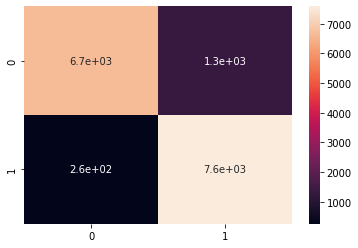

In [372]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True)
cm

## **DecissionTree**

In [374]:
from sklearn.model_selection import train_test_split
X = df.drop(['y'],axis = 1)
y = df['y']
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2 ,random_state = 0)

In [375]:
 from sklearn.preprocessing import StandardScaler
 standardisation = StandardScaler()
 X_after_standardise =  standardisation.fit_transform(X_train)
 print(X_after_standardise)

[[-0.76771423 -1.16795726  1.34230907 ... -0.34808286 -0.13272546
  -0.06011846]
 [-0.6817245  -1.16795726  0.02101564 ... -0.34808286 -0.13272546
  -0.06011846]
 [-0.16578612  0.50188693 -1.30027779 ... -0.34808286 -0.13272546
  -0.06011846]
 ...
 [-0.93969369 -1.16795726  0.02101564 ... -0.34808286 -0.13272546
  -0.06011846]
 [ 1.38202904  2.17173111  1.34230907 ... -0.34808286 -0.13272546
  -0.06011846]
 [-0.59573477 -1.16795726  0.02101564 ... -0.34808286 -0.13272546
  -0.06011846]]


In [376]:
from sklearn import tree
model  = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [377]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [378]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
AUROC = roc_auc_score(y_test,y_pred)
print("AUROC SCORE:",AUROC)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

AUROC SCORE: 0.9168816827678908
accuracy:  0.9170457417235279


array([[7055,  780],
       [ 533, 7460]])

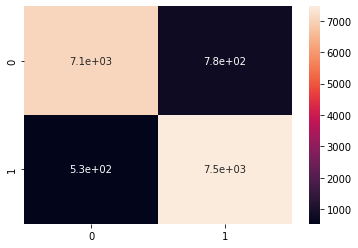

In [379]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
cm

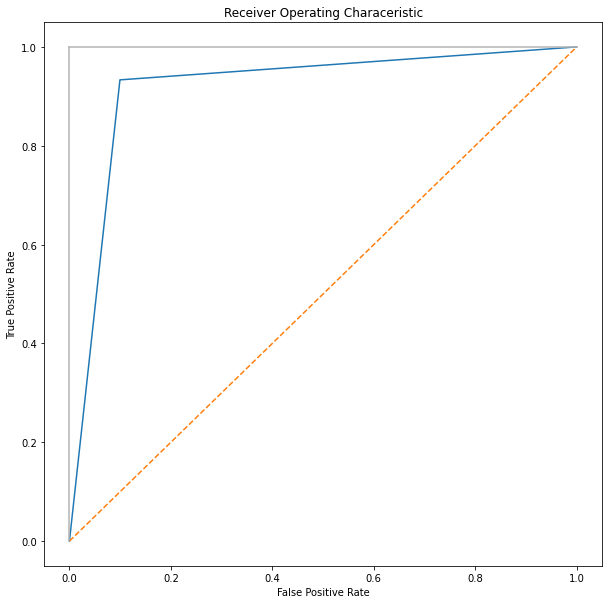

In [380]:
from sklearn.metrics import roc_curve
y_score1 = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thershold1 = roc_curve(y_test,y_score1)
plt.subplots(1,figsize=(10,10))
plt.title("Receiver Operating Characeristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c=".7"),plt.plot([1,1],c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **RandomForestClassifier**

In [381]:
from sklearn.model_selection import train_test_split
X =df.drop(['y'],axis=1)
y =df['y']
X_train,X_test,y_train,y_test =train_test_split(X_res,y_res, test_size= 0.33,random_state =0)

In [382]:
from sklearn.preprocessing import StandardScaler
standardisation =StandardScaler()
X_after_standardise=standardisation.fit_transform(X_train)
print(X_after_standardise)


[[-0.16586531 -1.16537379  0.02201921 ... -0.3471256  -0.13258662
  -0.06075545]
 [-0.76702867  2.17155692  0.02201921 ...  2.88080161 -0.13258662
  -0.06075545]
 [-0.76702867 -1.16537379  1.34125614 ...  2.88080161 -0.13258662
  -0.06075545]
 ...
 [-0.93878962 -1.16537379  0.02201921 ... -0.3471256  -0.13258662
  -0.06075545]
 [ 1.37998332  2.17155692  1.34125614 ... -0.3471256  -0.13258662
  -0.06075545]
 [-0.59526771 -1.16537379  0.02201921 ... -0.3471256  -0.13258662
  -0.06075545]]


In [383]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [384]:
y_pred =rfc.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [385]:

from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
AUROC =roc_auc_score(y_test,y_pred)
F1_score =f1_score(y_test,y_pred)
print("AUROC score:",AUROC)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

AUROC score: 0.9379878302504232
accuracy:  0.9380097254661715


array([[12044,   816],
       [  803, 12454]])

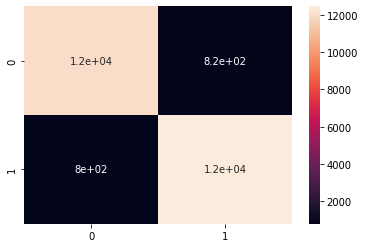

In [386]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
cm

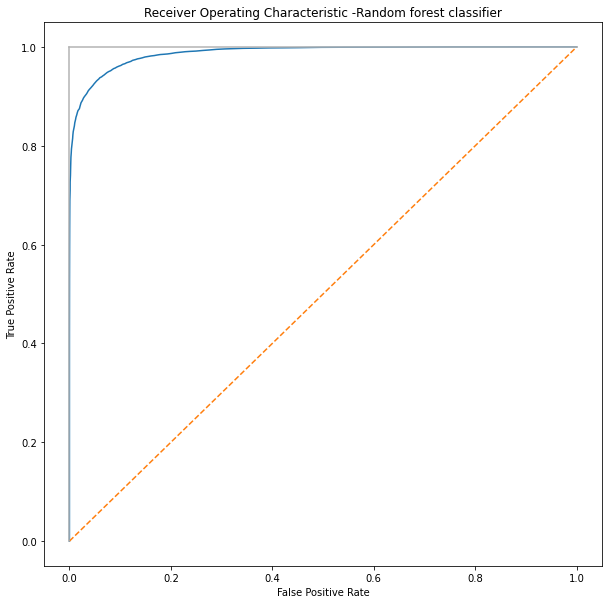

In [387]:
from sklearn.metrics import roc_curve
y_score1 = rfc.predict_proba(X_test)[:,1] 
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score1) 
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic -Random forest classifier')
plt.plot(false_positive_rate, true_positive_rate) 
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

## **XGB**

In [388]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators =100 , verbosity = 0,random_state=50)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [389]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
AUROC =roc_auc_score(y_test,y_pred)
print("AUROC score:",AUROC)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

AUROC score: 0.9231517085782669
accuracy:  0.9230769230769231


array([[11935,   925],
       [ 1084, 12173]])

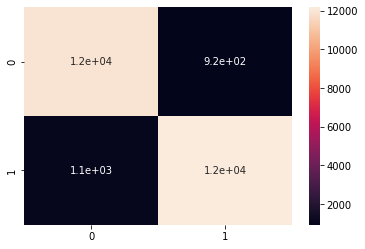

In [390]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
cm

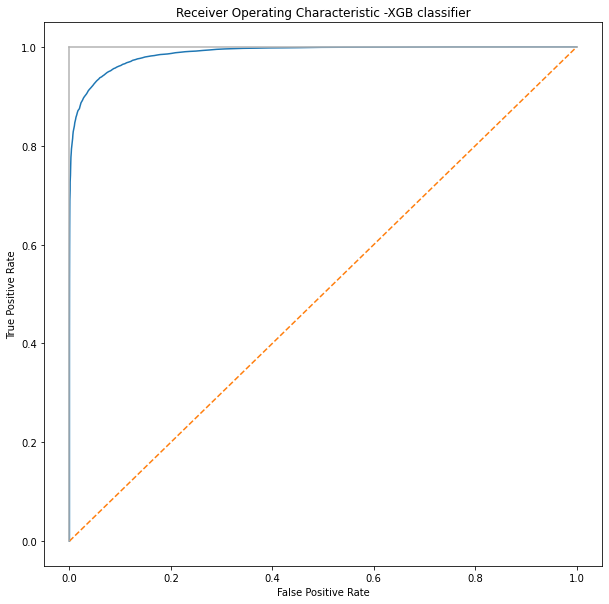

In [391]:
from sklearn.metrics import roc_curve
y_score1 = rfc.predict_proba(X_test)[:,1] 
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score1) 
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic -XGB classifier')
plt.plot(false_positive_rate, true_positive_rate) 
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

## **Naive Bayes classifier**

In [392]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [393]:

from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
AUROC =roc_auc_score(y_test,y_pred)
print("AUROC score:",AUROC)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

AUROC score: 0.8119921621266197
accuracy:  0.8135314163188727


array([[ 9140,  3720],
       [ 1150, 12107]])

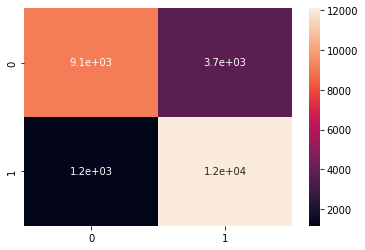

In [394]:


from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
cm

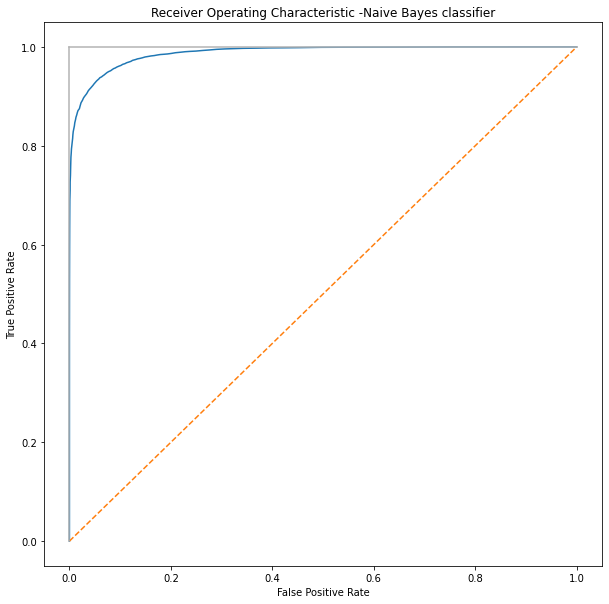

In [395]:

from sklearn.metrics import roc_curve
y_score1 = rfc.predict_proba(X_test)[:,1] 
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score1) 
plt.subplots(1, figsize=(10,10)) 
plt.title('Receiver Operating Characteristic -Naive Bayes classifier')
plt.plot(false_positive_rate, true_positive_rate) 
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

## **LogReg**

### Fitting Logistic Regression to Training set


In [396]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=1000)

### Prediction of Logistic Regression Model

In [397]:


y_pred  =  log.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [398]:
# Evaluating the Prediction
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = log.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('AUROC_score : ', roc_auc_score(y_test, y_score1))
print("accuracy: ",accuracy_score(y_test,y_pred))

AUROC_score :  0.9648037170655817
accuracy:  0.9012903472833786


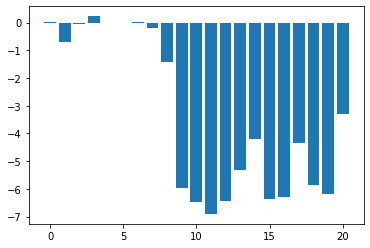

In [399]:

importance = log.coef_[0]
scores = []
for i,v in enumerate(importance):
  scores.append(("%.3f" % v))
scores
d = {}
for i,j in zip(scores,range(22)):
  d.update({j:i})

plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [400]:
sorted_values = sorted(d.items(),key=lambda x:x[1],reverse=True)
print(sorted_values)

[(3, '0.228'), (0, '0.018'), (6, '0.005'), (4, '0.002'), (11, '-6.903'), (10, '-6.462'), (12, '-6.425'), (15, '-6.371'), (16, '-6.287'), (19, '-6.202'), (9, '-5.964'), (18, '-5.875'), (13, '-5.320'), (17, '-4.343'), (14, '-4.211'), (20, '-3.302'), (8, '-1.439'), (1, '-0.703'), (7, '-0.182'), (2, '-0.067'), (5, '-0.007')]


In [401]:



X_train.columns

Index(['age', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'prev_outcome', 'admin.', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown'],
      dtype='object')

In [402]:
print("Feature17: Student" ,sorted_values[0][1])
print("Feature3: Call_type" ,sorted_values[1][1])
print("Feature14: Retired" ,sorted_values[2][1])
print("Feature2: Marital" ,sorted_values[3][1])
print("Feature5: Month" ,sorted_values[4][1])
print("Feature0: Age" ,sorted_values[5][1])
print("Feature6: Duration of Calls" ,sorted_values[6][1])
print("Feature8: Previous Outcome" ,sorted_values[7][1])
print("Feature10: Blue-Collar" ,sorted_values[8][1])
print("Feature11: Entrepreneur" ,sorted_values[9][1])

Feature17: Student 0.228
Feature3: Call_type 0.018
Feature14: Retired 0.005
Feature2: Marital 0.002
Feature5: Month -6.903
Feature0: Age -6.462
Feature6: Duration of Calls -6.425
Feature8: Previous Outcome -6.371
Feature10: Blue-Collar -6.287
Feature11: Entrepreneur -6.202


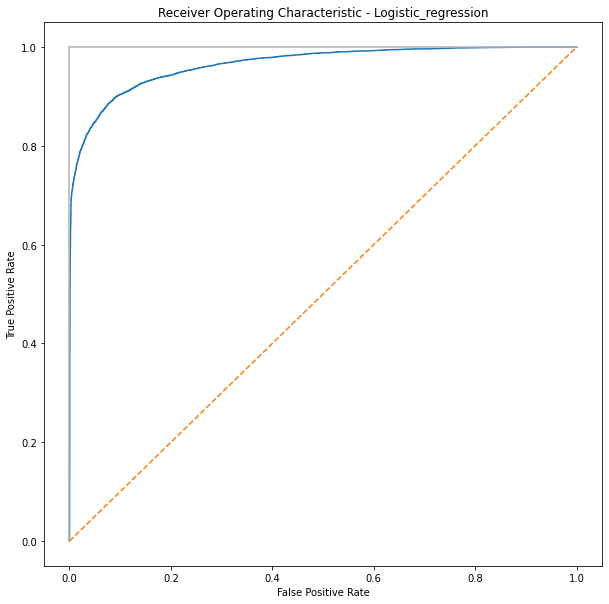

In [403]:


# Plotting the ROC Curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic_regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

array([[12882,   281],
       [ 1309,   448]])

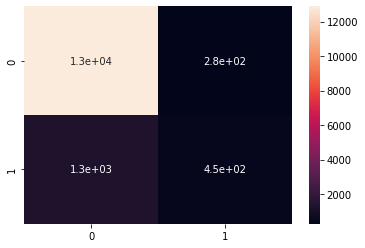

In [363]:



from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True)
conf_matrix

In this project I have analysed through the given data and used various machine learning models for prediction.

The problem statement given is Supervised Learning and of type Binary classification.

I have Evaluated our models with AUROC_Score and LogisticRegression was found to give highest score of 0.85.

The top 3 important feautures found from LogReg model are

        1)Student

        2)Retired persons

        3)Marital status

  Category Call_type also is holding highest importance in feauture selection, but I omiited that with a assumption that a Customer is not going to care about the means of calling.

The importance of Students and Retired person could be easily understood in the job vs target graphs.

The number of Singles getting an insurance is high from the marital status vs target graph.